<a href="https://colab.research.google.com/github/naritaku/Googlecolaboratory/blob/master/cs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


滑らかな曲線

## 1. 補間を行うことで滑らかさを実現したい。

補完の方法
- スプライン補間(通る点の座標、傾きが一致するように点を結ぶ方法。二回微分まで連続)
- ラグランジュ補間(必ず点は通るがデータの両端でルンゲ現象が起こる)

(x,y)連続で増加しない
極座標表示$( R,\theta)$に変換することで、$\theta$が単調に増加としてみなせるのでは？

->閉じる作業はやっていないので厳密に滑らかな閉区間ではない
(1mの移動が許されることからも大きな誤差にはならないかも)





元の通過しなければいけない点


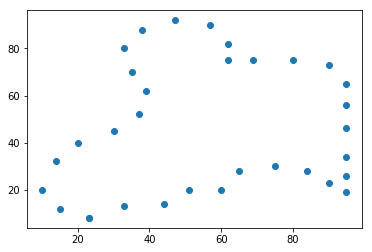

極座標変換した半径方向の変化
極座標変換した半径方向の変化


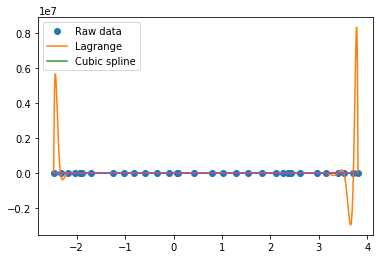

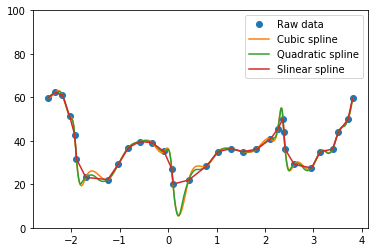

もとの直交座標系に戻した滑らかなルート


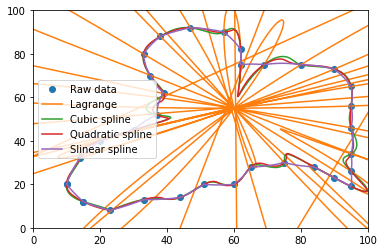

もとの直交座標系に戻した滑らかなルート(スプラインのみ)


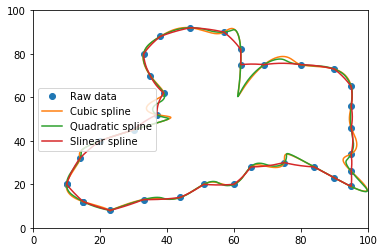

In [0]:
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
  
  
def rtheta(x,y):
  r=np.sqrt(x*x+y*y)
  theta=np.arctan2(x, y)
  return r,theta

x = [23,15,10,14,20,30,37,39,35,33,38,47,57,62,62,69,80,90,95,95,95,95,95,95,90,84,75,65,60,51,44,33,23]
y = [8,12,20,32,40,45,52,62,70,80,88,92,90,82,75,75,75,73,65,56,46,34,26,19,23,28,30,28,20,20,14,13, 8]

print("元の通過しなければいけない点")
plt.plot(x, y, 'o')
plt.show()


r=[]
theta=[]

flug=0
"""
for x1 in range(300,700):
  x1/=10
  for y1 in range(300,700):
    y1/=10
    theta=-4
    for i in range(len(x)):
      a=rtheta(x[i]-x1,y[i]-y1)
      deg=a[1]
      if theta>deg:
        flug=1
        break
      theta=deg
    if flug==0:
      print(x1,y1)
"""
x0=60
y0=55

r=[]
theta=[]

glaphx=[]
glaphy=[]

for i in range(len(x)):
  a=rtheta(x[i]-x0,y[i]-y0)
  deg=a[1]
  if len(theta) >1 and theta[len(theta)-1]>deg:
        deg+=2*np.pi
        """r.append(a[0])
        theta.append(deg)
        flug=1
        glaphy.append(r)
        glaphx.append(theta)
        r=[]
        theta=[]"""
  r.append(a[0])
  theta.append(deg)
 # print(a)
glaphy.append(r)
glaphx.append(theta)
        
print("極座標変換した半径方向の変化")  
#plt.plot(theta, r, 'o')
#plt.show() 

#print(r)
#print(theta)
for i in range(len(glaphx)):
  x = np.array(glaphx[i])
  y = np.array(glaphy[i])
  #print(x)
  f_line = interp1d(x, y)
  f_Lag=lagrange(x,y) 
  f_CS3 = interp1d(x, y, kind='cubic')
  f_CS2 = interp1d(x, y, kind='quadratic')
  f_CS1 = interp1d(x, y, kind='slinear')
  
  print("極座標変換した半径方向の変化")  
  #for plot
  xnew =np.linspace(x[0], x[-1], num=1000)
  plt.plot(x, y, 'o')
  plt.plot(xnew, f_Lag(xnew), '-')
  plt.plot(xnew, f_CS3(xnew), '-')
  plt.plot(xnew, f_CS2(xnew), '-')
  plt.plot(xnew, f_CS1(xnew), '-')
  plt.legend(['Raw data','Lagrange', 'Cubic spline'], loc='best')
  plt.show()
  

  #for plot
  xnew =np.linspace(x[0], x[-1], num=1000)
  plt.plot(x, y, 'o')
  plt.plot(xnew, f_CS3(xnew), '-')
  plt.plot(xnew, f_CS2(xnew), '-')
  plt.plot(xnew, f_CS1(xnew), '-')
  plt.legend(['Raw data', 'Cubic spline', 'Quadratic spline', 'Slinear spline','Lagrange'], loc='best')
  plt.ylim([0, 100])
  plt.show()


  
  print("もとの直交座標系に戻した滑らかなルート")  
  x = [15,10,14,20,30,37,39,35,33,38,47,57,62,62,69,80,90,95,95,95,95,95,95,90,84,75,65,60,51,44,33,23,15,10]
  y = [12,20,32,40,45,52,62,70,80,88,92,90,82,75,75,75,73,65,56,46,34,26,19,23,28,30,28,20,20,14,13, 8,12,20]
  plt.plot(x, y, 'o')
  plt.plot(f_Lag(xnew)*np.sin(xnew)+x0,f_Lag(xnew)*np.cos(xnew)+y0,  '-')
  plt.plot(f_CS3(xnew)*np.sin(xnew)+x0,f_CS3(xnew)*np.cos(xnew)+y0,  '-')
  plt.plot(f_CS2(xnew)*np.sin(xnew)+x0,f_CS2(xnew)*np.cos(xnew)+y0,  '-')
  plt.plot(f_CS1(xnew)*np.sin(xnew)+x0,f_CS1(xnew)*np.cos(xnew)+y0,  '-')
  plt.legend(['Raw data','Lagrange', 'Cubic spline', 'Quadratic spline', 'Slinear spline'], loc='best')
  plt.xlim([0, 100])
  plt.ylim([0, 100])
  plt.show()
  
  print("もとの直交座標系に戻した滑らかなルート(スプラインのみ)")  
  plt.plot(x, y, 'o')
  plt.plot(f_CS3(xnew)*np.sin(xnew)+x0,f_CS3(xnew)*np.cos(xnew)+y0,  '-')
  plt.plot(f_CS2(xnew)*np.sin(xnew)+x0,f_CS2(xnew)*np.cos(xnew)+y0,  '-')
  plt.plot(f_CS1(xnew)*np.sin(xnew)+x0,f_CS1(xnew)*np.cos(xnew)+y0,  '-')
  plt.legend(['Raw data', 'Cubic spline', 'Quadratic spline', 'Slinear spline'], loc='best')
  plt.xlim([0, 100])
  plt.ylim([0, 100])
  plt.show()
  

  